In [4]:
from sqlalchemy import create_engine
import pandas as pd

In [5]:
%matplotlib inline

In [6]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}")

engine = create_engine(
    cnxn_string.format(
        username="postgres",
        pswd="postgres",
        host="localhost",
        port="5432",
        database="sqlda"
    )
)


In [7]:
query = """
SELECT
    city,
    COUNT(1) AS number_of_customers,
    COUNT(NULLIF(gender,'M')) AS womans,
    COUNT(NULLIF(gender,'F')) AS mans
FROM
    customers
WHERE
    city IS NOT NULL
GROUP BY
    city
ORDER BY
    number_of_customers DESC
LIMIT
    10;
"""

In [8]:

top_cities_data = pd.read_sql_query(query,engine)

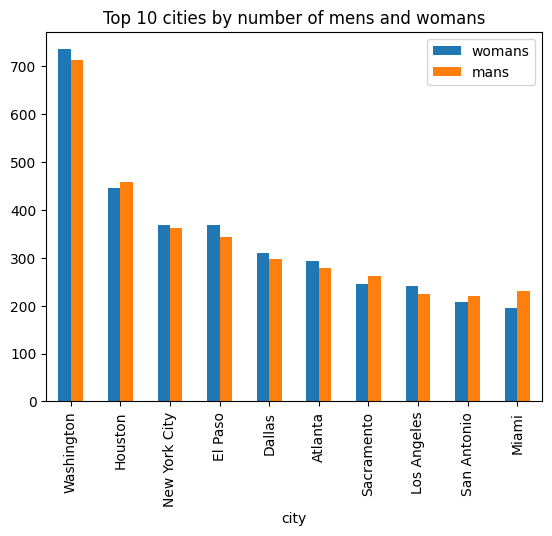

In [9]:
ax = top_cities_data.plot.bar('city', y=['womans', 'mans'], title='Top 10 cities by number of mens and womans')

In [10]:
top_cities_data.to_sql('top_cities_data', engine, index=False, if_exists='replace')

10

In [11]:
import csv
from io import StringIO

In [12]:
def psql_insert_copy(table, conn, keys, data_iter):
    # Pobiera połączenie DBAPI które udostępnia kursor
    dbapi_conn = conn.connection
    with dbapi_conn.cursor() as cur:
        s_buf = StringIO()
        writer = csv.writer(s_buf)
        writer.writerows(data_iter)
        s_buf.seek(0)
        columns = ', '.join('"{}"'.format(k) for k in keys)
        if table.schema:
            table_name = '{}.{}'.format(table.schema, table.name)
        else:
            table_name = table.name
        sql = 'COPY {} ({}) FROM STDIN WITH CSV HEADER' .format(table_name, columns)

In [13]:
top_cities_data.to_sql(
    'top_cities_data',
    engine,
    if_exists='replace',
    index=False,
    method=psql_insert_copy
)